# Komputasi Numerik Kelompok 3
## Kelas Komputasi Numerik D


*   Amanda Illona Farrel (5025221056)
*   Hilmi Fawwaz Sa'ad   (5025221103)
*   Ricardo Supriyanto   (5025221218)


# Soal Praktikum 2

Salah satu kelemahan dari metode Trapezoidal adalah kita harus menggunakan jumlah interval yang besar untuk memperoleh akurasi yang diharapkan. Buatlah sebuah program komputer untuk menjelaskan bagaimana metode Integrasi Romberg dapat mengatasi kelemahan tersebut.

Akar ditemukan: 1.52138

Iterasi |    a      |    b      |    c      |  f(c)     
------------------------------------------------------
       1 | 1.000000 | 2.000000 | 1.500000 | -0.125000
       2 | 1.500000 | 2.000000 | 1.750000 | 1.609375
       3 | 1.500000 | 1.750000 | 1.625000 | 0.666016
       4 | 1.500000 | 1.625000 | 1.562500 | 0.252197
       5 | 1.500000 | 1.562500 | 1.531250 | 0.059113
       6 | 1.500000 | 1.531250 | 1.515625 | -0.034054
       7 | 1.515625 | 1.531250 | 1.523438 | 0.012250
       8 | 1.515625 | 1.523438 | 1.519531 | -0.010971
       9 | 1.519531 | 1.523438 | 1.521484 | 0.000622
      10 | 1.519531 | 1.521484 | 1.520508 | -0.005179
      11 | 1.520508 | 1.521484 | 1.520996 | -0.002279
      12 | 1.520996 | 1.521484 | 1.521240 | -0.000829
      13 | 1.521240 | 1.521484 | 1.521362 | -0.000103
      14 | 1.521362 | 1.521484 | 1.521423 | 0.000259
      15 | 1.521362 | 1.521423 | 1.521393 | 0.000078
      16 | 1.521362 | 1.521393 | 1.521378 | -0.000013


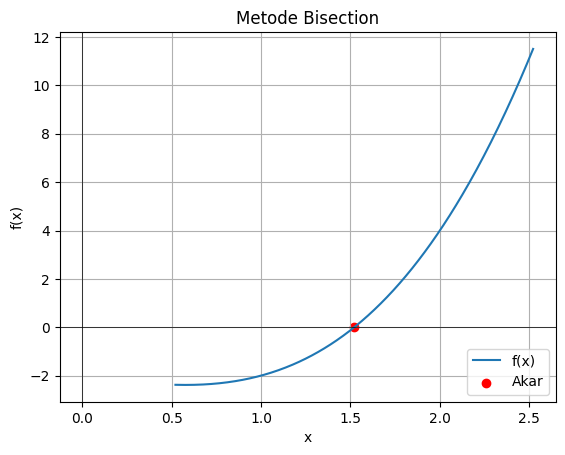

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**3 - x - 2  # Contoh fungsi

def bisection_method(a, b, tol):
    if f(a) * f(b) >= 0:
        print("Metode bisection gagal.")
        return None

    iterations = []
    iteration_counter = 0
    while (b-a) / 2.0 > tol:
        iteration_counter += 1
        c = (a + b) / 2.0
        iterations.append((iteration_counter, a, b, c, f(c)))

        if f(c) == 0:
            break
        elif f(a) * f(c) < 0:
            b = c
        else:
            a = c

    return c, iterations

# Parameter
a = 1
b = 2
tol = 1e-5

# Temukan akarnya
root, iterations = bisection_method(a, b, tol)
print(f"Akar ditemukan: {root:.5f}\n")

# Menampilkan iterasi
print("Iterasi |    a      |    b      |    c      |  f(c)     ")
print("------------------------------------------------------")
for i, a, b, c, fc in iterations:
    print(f"{i:8d} | {a:.6f} | {b:.6f} | {c:.6f} | {fc:.6f}")

# Plot fungsi dan akarnya
x = np.linspace(a-1, b+1, 400)
y = f(x)

plt.plot(x, y, label='f(x)')
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.scatter(root, f(root), color='red', label='Akar')
plt.legend()
plt.title('Metode Bisection')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()
plt.show()


In [ ]:
import numpy as np

def f(x):
    return np.sin(x)  # Contoh fungsi yang akan diintegrasikan

def trapezoidal_rule(f, a, b, n):
    h = (b - a) / n
    result = 0.5 * (f(a) + f(b))
    for i in range(1, n):
        result += f(a + i * h)
    result *= h
    return result

def romberg_integration(f, a, b, tol=1e-6):
    R = [[0.5 * (b - a) * (f(a) + f(b))]]  # R[0][0] adalah hasil awal metode Trapezoidal
    n = 1
    k = 0
    while True:
        n *= 2
        h = (b - a) / n
        sum_f = sum(f(a + (2 * i - 1) * h) for i in range(1, n // 2 + 1))
        R_k1 = 0.5 * R[k][0] + sum_f * h
        R.append([R_k1])
        for j in range(1, k + 2):
            R_kj = R[k + 1][j - 1] + (R[k + 1][j - 1] - R[k][j - 1]) / (4**j - 1)
            R[k + 1].append(R_kj)
        if abs(R[k + 1][k + 1] - R[k][k]) < tol:
            return R, R[k + 1][k + 1]
        k += 1

# Parameter integrasi
a = 0
b = np.pi
tol = 1e-6

# Menghitung integrasi menggunakan metode Romberg
R, integral = romberg_integration(f, a, b, tol)
print(f"Nilai integral menggunakan metode Romberg: {integral:.6f}")

# Menampilkan hasil iterasi
print("\nTabel Romberg:")
print("k |  R[k,0]  |  R[k,1]  |  R[k,2]  |  ...  ")
print("-----------------------------------------")
for i in range(len(R)):
    row = [f"{R[i][j]:.6f}" for j in range(len(R[i]))]
    print(f"{i} | " + " | ".join(row))


Nilai integral menggunakan metode Romberg: 2.000000

Tabel Romberg:
k |  R[k,0]  |  R[k,1]  |  R[k,2]  |  ...  
-----------------------------------------
0 | 0.000000
1 | 1.570796 | 2.094395
2 | 1.896119 | 2.004560 | 1.998571
3 | 1.974232 | 2.000269 | 1.999983 | 2.000006
4 | 1.993570 | 2.000017 | 2.000000 | 2.000000 | 2.000000
5 | 1.998393 | 2.000001 | 2.000000 | 2.000000 | 2.000000 | 2.000000
